# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [5]:
!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [6]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [7]:
print(f'Training images shape: {training_images.shape}')
print(f'Training labels shape: {training_labels.shape}')

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

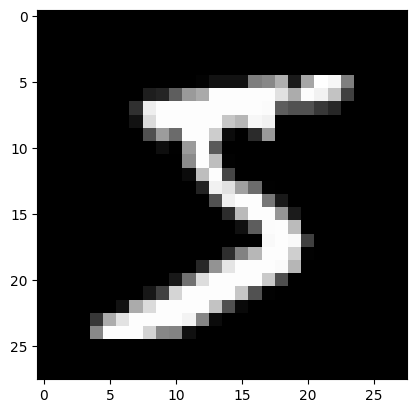

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###

*Tu respuesta aquí*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [ ]:
### Tu código aquí ###

*Tu respuesta aquí*

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [ ]:
### Tu código aquí ###

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [ ]:
### Tu código aquí ###

**Respuesta a la pregunta 2.2**:

**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [ ]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [ ]:
### Tu código aquí ###

Respuesta a la pregunta 2.3:

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [ ]:
### Tu código para la red neuronal de la pregunta 3 aquí ###

**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



In [ ]:
### Tu código para incluir una capa flatten si lo ves necesario ###

**Respuesta a la pregunta 3.2**:

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [ ]:
### Tu código aquí ###

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [ ]:
### Tu código aquí ###

**Respuesta a la pregunta 4.1**:

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [ ]:
### Tu código aquí ###

# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
### Tu código para 216 neuronas aquí ###

In [ ]:
### Tu código para 1024 neuronas aquí ###

**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Respuesta a la pregunta 5.1:

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

Tu respuestas a la pregunta 6.1 aquí:

Tu respuestas a la pregunta 6.2 aquí:

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###

In [ ]:
### Tu código para 30 epoch aquí ###

Tu respuesta a la pregunta 7.3 aquí:

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [ ]:
### Tu código aquí ###

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## pero recuerda visualizar la gráfica con la tasa de acierto
## así como utilizar la función predict() para tu última evaluación
## (deberás consultar la documentación de Keras para entender la función)
## No olvides utilizar celdas de Markdown para texto